In [59]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-whitegrid")

# Display more cols
pd.set_option("display.max_columns", 500)

##### Merge 12 months of sales data into a single csv file 

In [8]:
for file in files:
    print(file)

all_data.csv
full_data.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [9]:
files =[file for file in os.listdir("Sales_Data")]
path = "Sales_Data"

#blank dataframe
full_data = pd.DataFrame()

for file in files:
    current_df = pd.read_csv(path+"/"+file)
    full_data = pd.concat([full_data, current_df])
    
full_data.shape

(186850, 6)

##### Data cleaning and formatting

In [10]:
full_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [11]:
full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [12]:
full_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [14]:
full_data = full_data.dropna(how='all')
full_data.shape

(186305, 6)

In [17]:
# Đổi columns về lower và snake_case

import re

cols = [re.sub("[ -]", "_", x).lower() for x in full_data.columns]
full_data.columns = cols

In [19]:
full_data.columns

Index(['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address'],
      dtype='object')

In [20]:
## convert order_date sang dạng date

full_data['adjusted_order_date'] = pd.to_datetime(full_data['order_date'], errors = 'coerce')

In [24]:
cond = full_data['adjusted_order_date'].isnull() == True

In [25]:
full_data.loc[cond, :]

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,adjusted_order_date
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,NaT
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,NaT
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,NaT
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,NaT
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,NaT
...,...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,NaT
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,NaT
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,NaT
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,NaT


- Bỏ các giá trị bị lỗi

In [26]:
full_data = full_data.loc[full_data['adjusted_order_date'].isnull() == False, :]

In [29]:
full_data['order_date'] = pd.to_datetime(full_data['order_date'])

In [31]:
full_data.drop('adjusted_order_date', axis= 1, inplace= True)

In [38]:
# convert số lượng đơn hàng, mức giá sang dạng numeric

full_data['quantity_ordered'] = full_data['quantity_ordered'].astype(int)
full_data['price_each'] = full_data['price_each'].astype(float)


In [49]:
full_data.dtypes

order_id                    object
product                     object
quantity_ordered             int32
price_each                 float64
order_date          datetime64[ns]
purchase_address            object
order_month                  int64
sales                      float64
dtype: object

##### What is the best month for sale?

In [63]:
full_data['order_month'] = full_data['order_date'].dt.month
full_data['sales'] = full_data['quantity_ordered'] * full_data['price_each']

In [64]:
plot_data = full_data.groupby('order_month')['sales'].sum()\
                                                    .reset_index()

In [65]:
plot_data

,order_month,sales
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


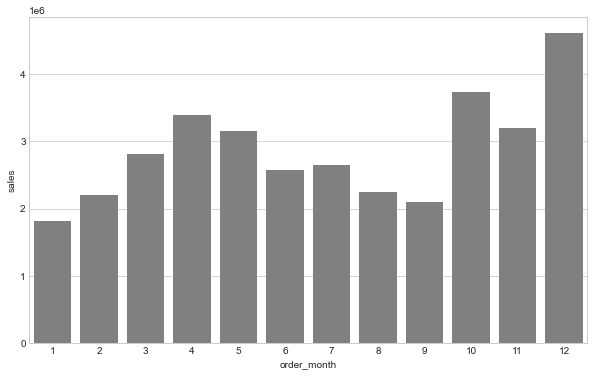

In [71]:
fig, ax = plt.subplots(figsize = (10,6))

sns.barplot(
    x = 'order_month',
    y = 'sales',
    data = plot_data,
    color = 'gray',
    ax = ax
)

plt.show()

##### Which city has max order

In [73]:
full_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,order_month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [76]:
# get city from address

def get_city(x):
    city = ''
    city = x.split(',')[1]

    return city

In [77]:
full_data['city'] = full_data['purchase_address'].apply(get_city)

In [93]:
top_orders = full_data.groupby('city').size()\
                                        .reset_index()

In [94]:
top_orders.columns = ['city', 'orders']

In [97]:
top_orders.sort_values('orders', ascending = False)

,city,orders
7,San Francisco,44732
4,Los Angeles,29605
5,New York City,24876
2,Boston,19934
0,Atlanta,14881
3,Dallas,14820
8,Seattle,14732
6,Portland,12465
1,Austin,9905


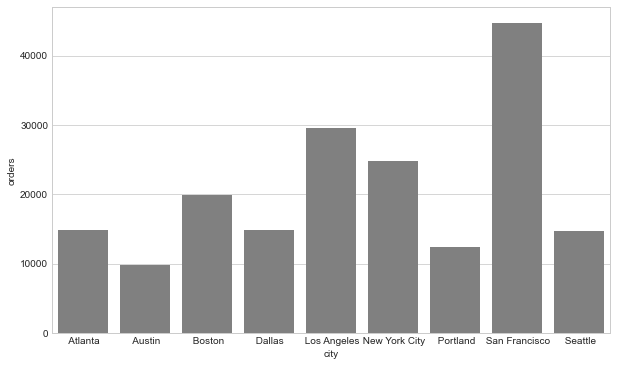

In [98]:
fig, ax = plt.subplots(figsize = (10,6))

sns.barplot(
    x = 'city',
    y = 'orders',
    data = top_orders,
    color = 'gray',
    ax = ax
)

plt.show()

##### What time should we display advertisements to maximise for product purchase?

In [99]:
full_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,order_month,sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [103]:
full_data['order_hour'] = full_data['order_date'].dt.hour

In [104]:
orders_by_hour = full_data.groupby('order_hour').size()\
                                                .reset_index()

In [115]:
orders_by_hour.sort_values('orders', ascending= False)

,order_hour,orders
19,19,12905
12,12,12587
11,11,12411
18,18,12280
20,20,12228
13,13,12129
14,14,10984
10,10,10944
21,21,10921
17,17,10899


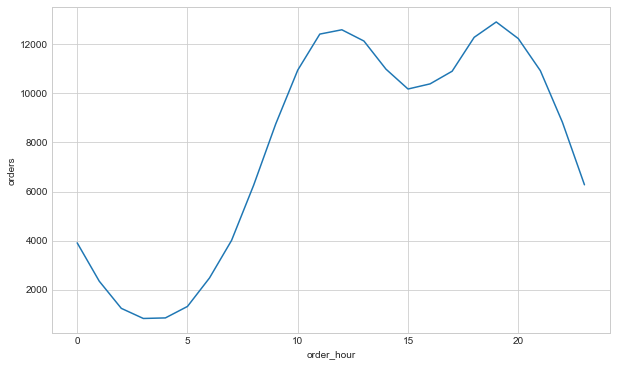

In [112]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig, ax = plt.subplots(figsize = (10,6))

sns.lineplot(
    x = 'order_hour',
    y = 'orders',
    data = orders_by_hour,
    ax = ax
    
)

ax.xaxis.set_minor_locator(MultipleLocator(1))

##### between 12pm and 7pm is probably the best time to advertise to maximise product purchase

#### What product sold the most? &  Why?

In [117]:
full_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,order_month,sales,city,order_hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


<AxesSubplot:xlabel='product'>

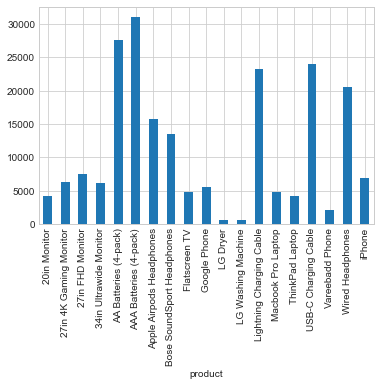

In [116]:
full_data.groupby('product')['quantity_ordered'].sum().plot(kind='bar')

In [166]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [167]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

[Text(0, 0, '20in Monitor'),
 Text(0, 0, '27in 4K Gaming Monitor'),
 Text(0, 0, '27in FHD Monitor'),
 Text(0, 0, '34in Ultrawide Monitor'),
 Text(0, 0, 'AA Batteries (4-pack)'),
 Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(0, 0, 'Apple Airpods Headphones'),
 Text(0, 0, 'Bose SoundSport Headphones'),
 Text(0, 0, 'Flatscreen TV'),
 Text(0, 0, 'Google Phone'),
 Text(0, 0, 'LG Dryer'),
 Text(0, 0, 'LG Washing Machine'),
 Text(0, 0, 'Lightning Charging Cable'),
 Text(0, 0, 'Macbook Pro Laptop'),
 Text(0, 0, 'ThinkPad Laptop'),
 Text(0, 0, 'USB-C Charging Cable'),
 Text(0, 0, 'Vareebadd Phone'),
 Text(0, 0, 'Wired Headphones'),
 Text(0, 0, 'iPhone')]

<Figure size 2880x1728 with 0 Axes>

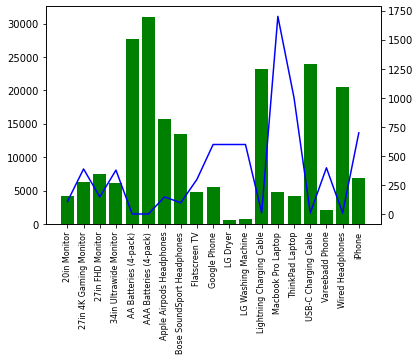

In [168]:
plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)

##### The top selling product is 'AAA Batteries'. The top selling products seem to have a correlation with the price of the product. The cheaper the product higher the quantity ordered and vice versa.

In [123]:
all_data.shape

(197579, 10)

##### What products are most often sold together?

#### note: keep orders that have same order Id,are sold mostly together

In [169]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,17
33,176586,Google Phone,1,600.00,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco,17
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,11
120,176672,USB-C Charging Cable,1,11.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,11.95,New York City,11


In [170]:
#create grouped col 
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\mcr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [171]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [172]:
df.shape

(14649, 11)

In [174]:
#lets drop out all duplicate Order ID
df2 = df.drop_duplicates(subset=['Order ID'])

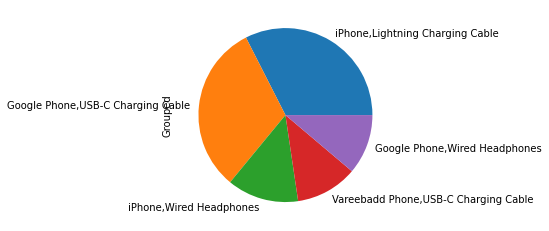

In [179]:
df2['Grouped'].value_counts()[0:5].plot.pie()

In [180]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [185]:
values=df2['Grouped'].value_counts()[0:5]
labels=df['Grouped'].value_counts()[0:5].index

In [186]:
trace=go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=25),
              pull=[0, 0, 0,0.2, 0]
               )

In [187]:
iplot([trace])